In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# We are bulid our model using SARIMA and SARIMAX 
# SARIMA handels seasonality but do not external factors

In [3]:
res = pd.read_csv(r"C:\Users\Siddhesh Patil\OneDrive\Desktop\imarticus\pranjal sir home ass\RestaurantVisitors.csv" , index_col = 'date',parse_dates=True)

In [4]:
res.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [5]:
res = res.dropna()

In [6]:
res.shape

(478, 8)

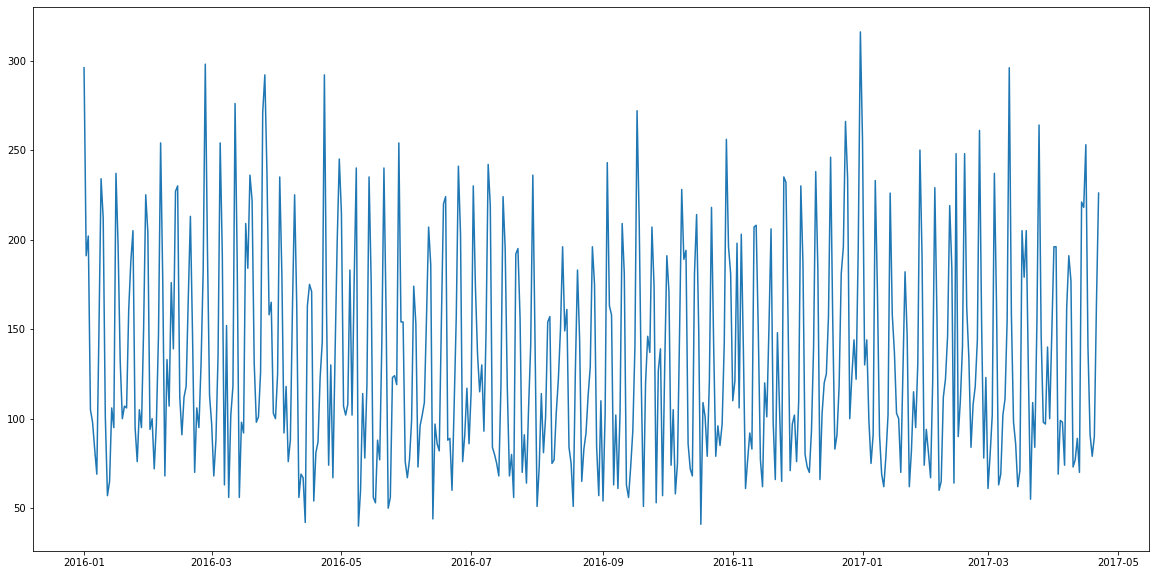

In [7]:
plt.figure(figsize=(20,10))
plt.plot(res.total)

In [8]:
# Seasonal ? (its seasonal with a time preiod of week 7 days)
# trends  ?  (no trend)
# stationarity  ?? (almost stationarity)

In [9]:
ho_index = res[res.holiday == 1 ]. index

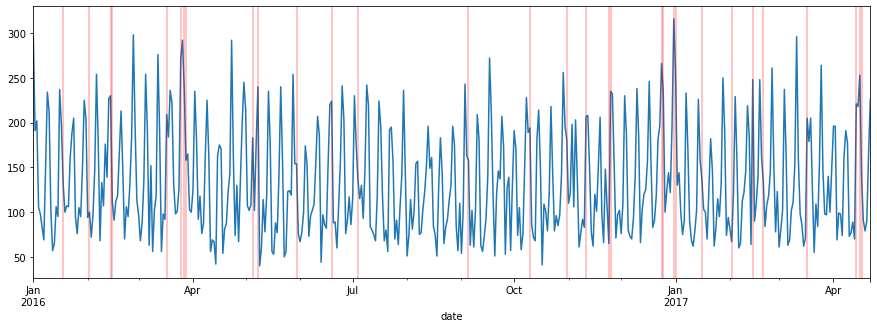

In [10]:
ax = res['total'].plot(figsize = (15,5))
for day in ho_index:
    ax.axvline(x = day , color = 'r' , alpha = .3)
    
# this graph is to show that holidays is impacting the number of ppl visiting rest
# normaly with holiday there is a sudden incresase

# so SARIMA model may not sufficent and SARIMAX model has to be used

In [14]:
import pmdarima
from pmdarima import auto_arima

In [17]:
auto_arima(res['total'] , seasonal = True , m =7 )

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(1, 0, 1, 7),
      suppress_warnings=True)

In [ ]:
# do the sampling

In [18]:
res.shape

(478, 8)

In [19]:
res_train = res.iloc[0:450]
res_test = res.iloc[450::]

In [21]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [23]:
model_sarima  = SARIMAX(res_train['total'],order=(0, 0, 0) , seasonal_order=(1, 0, 1, 7) )

D:\Data science\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [24]:
results_res  = model_sarima.fit()

In [25]:
pred_res_sarima = results_res.predict(start = 450 , end = 477)

In [29]:
pred_res_round = np.round(pred_res_sarima )

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


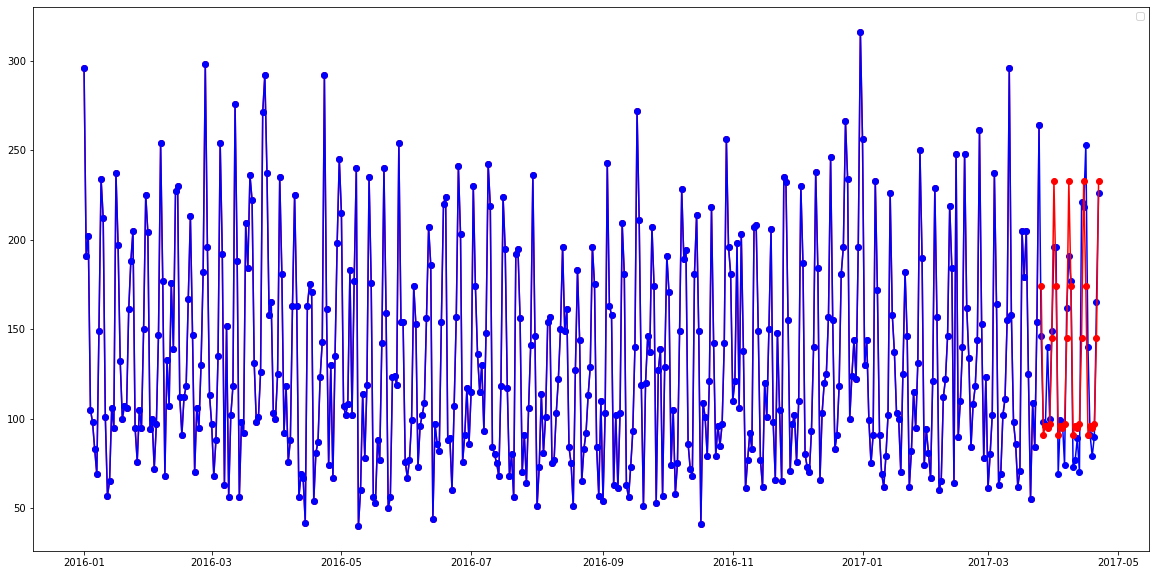

In [46]:
plt.figure(figsize=(20 ,10)),
plt.plot(res_train['total'] ,color = 'r' , marker = 'o' )
plt.plot(res.total ,color = 'b' , marker = 'o')
plt.plot(pred_res_round , color = 'r' , marker = 'o' )
plt.legend()

In [49]:
df = pd.DataFrame()

df["Actaul"] = res_test.total
df['Predict'] = pred_res_sarima
df['Error'] = res_test.total - pred_res_sarima
df['Precentage_error'] = df['Error'] * 100 / df["Actaul"]
df

,Actaul,Predict,Error,Precentage_error
date,,,,
2017-03-26,146.0,174.192749,-28.192749,-19.310102
2017-03-27,98.0,90.608599,7.391401,7.542246
2017-03-28,97.0,95.758593,1.241407,1.279801
2017-03-29,140.0,95.479749,44.520251,31.800179
2017-03-30,100.0,96.690128,3.309872,3.309872
2017-03-31,149.0,145.286356,3.713644,2.492378
2017-04-01,196.0,232.772179,-36.772179,-18.761316
2017-04-02,196.0,174.181811,21.818189,11.131729
2017-04-03,69.0,90.602910,-21.602910,-31.308564


In [51]:
mape = np.mean(np.abs(df['Precentage_error']))
mape

15.962454587896913

In [54]:
mse = np.mean(np.square(df['Error']))
mse

875.4565244411694

# model is not doing good for holidays its doing under perdiction for holiday
# so SARIMA model is needed to handel holidays

In [55]:
model2 = SARIMAX(res_train['total'] ,order = (0,0,0),
                 seasonal_order=(1,0,1,7),
                exog = res_train[['holiday']])

D:\Data science\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [56]:
result2 = model2.fit()

In [81]:
pred2 = result2.predict(start = 450 , end = 477, exog = res_test[['holiday']])

In [69]:
df2 = pd.DataFrame()

df2["Actaul"] = res_test.total
df2['Predict'] = pred2
df2['Error'] = res_test.total - pred2
df2['Precentage_error'] = df2['Error'] * 100 / df2["Actaul"]
df2

,Actaul,Predict,Error,Precentage_error
date,,,,
2017-03-26,146.0,168.903893,-22.903893,-15.687598
2017-03-27,98.0,80.487833,17.512167,17.869559
2017-03-28,97.0,92.835635,4.164365,4.293159
2017-03-29,140.0,95.490728,44.509272,31.792337
2017-03-30,100.0,92.207098,7.792902,7.792902
2017-03-31,149.0,138.796405,10.203595,6.848050
2017-04-01,196.0,229.113791,-33.113791,-16.894792
2017-04-02,196.0,168.895991,27.104009,13.828576
2017-04-03,69.0,80.484067,-11.484067,-16.643575


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


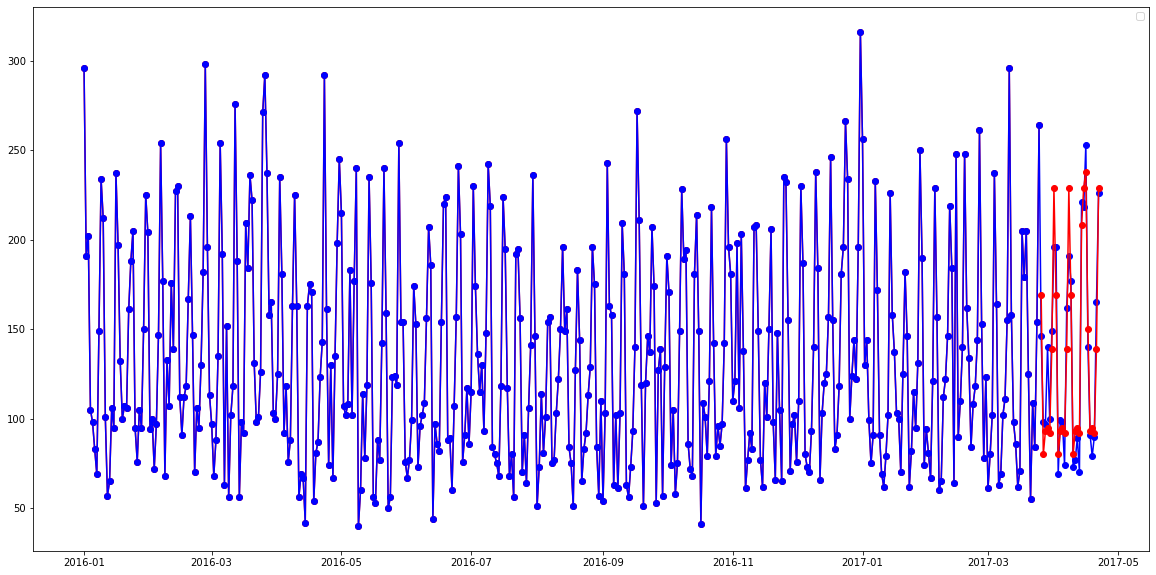

In [70]:
plt.figure(figsize=(20 ,10)),
plt.plot(res_train['total'] ,color = 'r' , marker = 'o' )
plt.plot(res.total ,color = 'b' , marker = 'o')
plt.plot(np.round(pred2) , color = 'r' , marker = 'o' )
plt.legend()

In [71]:
mse2 = np.mean(np.square(df2['Error']))
mse2

350.33826796995703

In [72]:
mape2 = np.mean(np.abs(df2['Precentage_error']))
mape2

12.14346234720193

In [73]:
from statsmodels.tsa.seasonal import seasonal_decompose

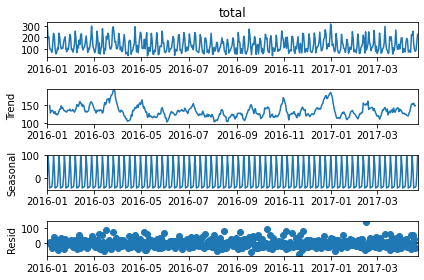

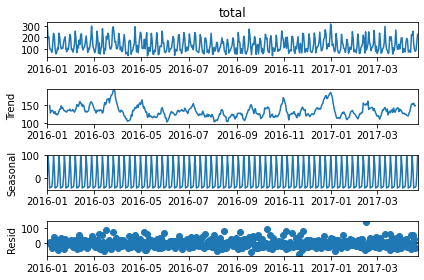

In [78]:
res_seasonal = seasonal_decompose(res.total)

res_seasonal.plot()

# Statitical test for stationality

In [82]:
# adfuller test for stationarity ( answer is p values)

# in adf test HO id fixed (that time series is NOT stationary)
#             Ha is fixed (that time series is stationary)